Highest transformed temperature: 35.00005999999999

Quadrant Statistics:
quadrant1 - Min: 21.89, Max: 33.74, Mean: 25.19
quadrant2 - Min: 24.27, Max: 34.95, Mean: 29.47
quadrant3 - Min: 22.31, Max: 35.00, Mean: 30.77
quadrant4 - Min: 25.90, Max: 34.16, Mean: 28.51

Quadrant Matrix (Mean Values):
[[25.19292482 29.46946873]
 [30.77167815 28.51344282]]


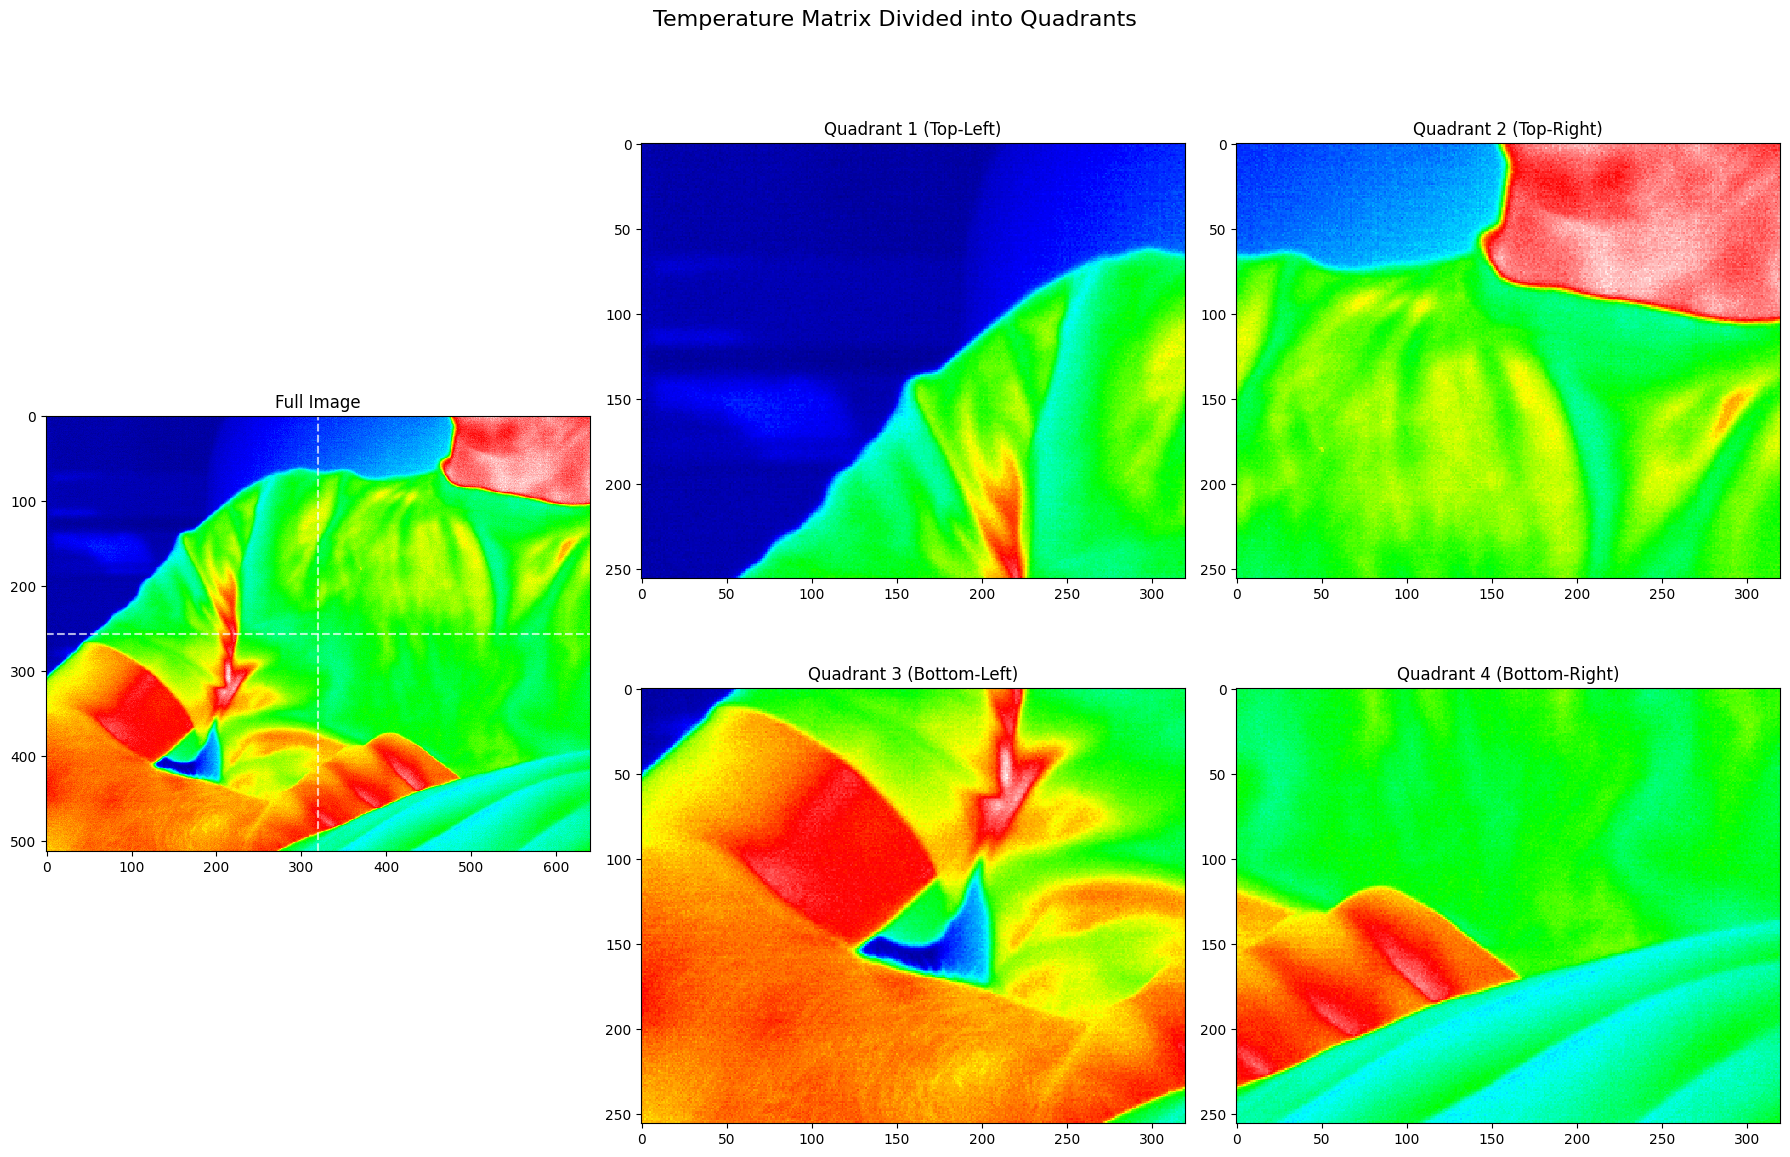

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from data_visualization import color_map
from data_handling.quadrant_data import *

def plot_quadrants(transformed_data, quadrants, midpoints):
    # Unpack the quadrants and midpoints
    quadrant1, quadrant2, quadrant3, quadrant4 = quadrants
    mid_row, mid_col = midpoints

    # Get the custom thermal colormap
    thermal_colormap_array = color_map.create_thermal_colormap()
    thermal_colormap_rgb = thermal_colormap_array.reshape(256, 3) / 255.0
    thermal_cmap = ListedColormap(thermal_colormap_rgb)

    # Set up the figure with a 2x3 grid for original image + 4 quadrants
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

    # Find the global min and max for consistent color scaling across all plots
    vmin = np.min(transformed_data)
    vmax = np.max(transformed_data)

    # Plot the full original image
    ax_full = plt.subplot(gs[:, 0])  # Span both rows in the first column
    im_full = ax_full.imshow(transformed_data, cmap=thermal_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    ax_full.set_title("Full Image")
    ax_full.axhline(y=mid_row, color='white', linestyle='--', alpha=0.7)
    ax_full.axvline(x=mid_col, color='white', linestyle='--', alpha=0.7)

    # Plot Quadrant 1 (Top-left)
    ax1 = plt.subplot(gs[0, 1])
    im1 = ax1.imshow(quadrant1, cmap=thermal_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    ax1.set_title("Quadrant 1 (Top-Left)")

    # Plot Quadrant 2 (Top-right)
    ax2 = plt.subplot(gs[0, 2])
    im2 = ax2.imshow(quadrant2, cmap=thermal_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    ax2.set_title("Quadrant 2 (Top-Right)")

    # Plot Quadrant 3 (Bottom-left)
    ax3 = plt.subplot(gs[1, 1])
    im3 = ax3.imshow(quadrant3, cmap=thermal_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    ax3.set_title("Quadrant 3 (Bottom-Left)")

    # Plot Quadrant 4 (Bottom-right)
    ax4 = plt.subplot(gs[1, 2])
    im4 = ax4.imshow(quadrant4, cmap=thermal_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    ax4.set_title("Quadrant 4 (Bottom-Right)")

    # Add main title to the figure
    plt.suptitle("Temperature Matrix Divided into Quadrants", fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle

    return fig

def main():
    # Load and transform the data
    transformed_data = load_and_transform_data("data/test_data/data.txt")

    # Find the highest transformed temperature
    max_temp = np.max(transformed_data)
    print(f"Highest transformed temperature: {max_temp}")

    # Divide the data into quadrants
    quadrants = divide_into_quadrants(transformed_data)
    quadrant1, quadrant2, quadrant3, quadrant4, mid_row, mid_col = quadrants

    # Calculate statistics for each quadrant
    stats = get_quadrant_statistics(quadrant1, quadrant2, quadrant3, quadrant4)

    # Print quadrant statistics
    print("\nQuadrant Statistics:")
    for quad_name, quad_stats in stats.items():
        print(f"{quad_name} - Min: {quad_stats['min']:.2f}, Max: {quad_stats['max']:.2f}, Mean: {quad_stats['mean']:.2f}")

    # Create and print the quadrant mean matrix
    quadrant_matrix = create_quadrant_mean_matrix(quadrant1, quadrant2, quadrant3, quadrant4)
    print("\nQuadrant Matrix (Mean Values):")
    print(quadrant_matrix)

    # Plot the quadrants
    fig = plot_quadrants(transformed_data,
                         (quadrant1, quadrant2, quadrant3, quadrant4),
                         (mid_row, mid_col))

    # Show the plot
    plt.show()

main()